<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%94%A5%ED%95%9C%EB%81%9D_9%EC%9E%A5_%ED%8C%A8%EC%85%98_MNIST_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [115]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [116]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [117]:
x_train = x_train / 255. # 정규화
x_val = x_val / 255.
x_test = x_test / 255.

In [118]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 512)               401920    
                                                                 
 dense_33 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='SGD',
#               metrics=['accuracy'])

In [120]:
# history = model.fit(x_train, y_train,
#                     epochs=60,
#                     batch_size=len(x_train), # 전체 배치 방법
#                     validation_data=(x_val, y_val))

# history = model.fit(x_train, y_train,
#                     epochs=60,
#                     batch_size=1, # 확률적 방법
#                     validation_data=(x_val, y_val))

history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=32, # 미니 배치 방법, 지정하지 않으면 기본값
                    validation_data=(x_val, y_val))

Epoch 1/60
1313/1313 [==============================] - 8s 6ms/step - loss: 1.2852 - accuracy: 0.6517 - val_loss: 0.8871 - val_accuracy: 0.7377
Epoch 2/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.7846 - accuracy: 0.7479 - val_loss: 0.7199 - val_accuracy: 0.7633
Epoch 3/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.6776 - accuracy: 0.7691 - val_loss: 0.6490 - val_accuracy: 0.7759
Epoch 4/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.6233 - accuracy: 0.7851 - val_loss: 0.6134 - val_accuracy: 0.7888
Epoch 5/60
1313/1313 [==============================] - 10s 7ms/step - loss: 0.5877 - accuracy: 0.7962 - val_loss: 0.5813 - val_accuracy: 0.7961
Epoch 6/60
1313/1313 [==============================] - 10s 7ms/step - loss: 0.5616 - accuracy: 0.8043 - val_loss: 0.5578 - val_accuracy: 0.8078
Epoch 7/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5420 - accuracy: 0.8119 - val_loss: 0.5467 - val_accurac

In [121]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

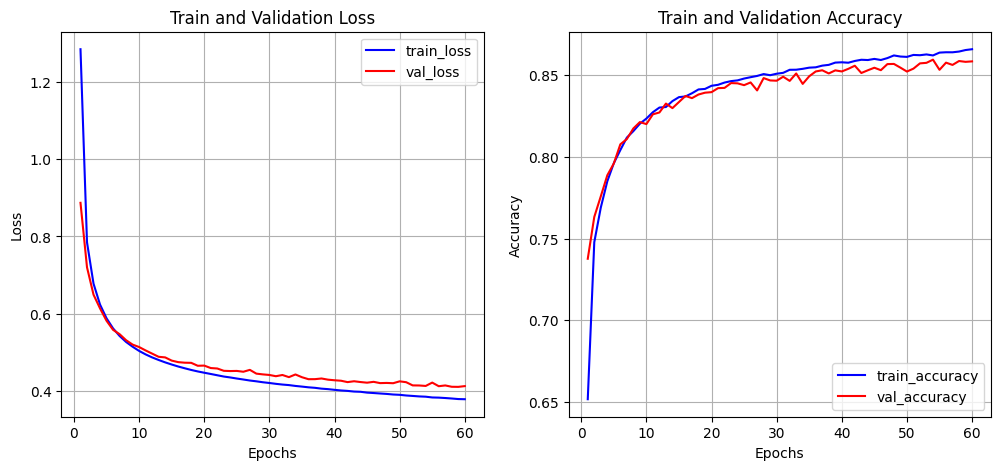

In [122]:
import matplotlib.pyplot as plt
import numpy as np
show_history(history)

In [123]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4322 - accuracy: 0.8474


[0.43220165371894836, 0.8474000096321106]

In [124]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [125]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

In [126]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 [==============================] - 1s 3ms/step
[4.3658363e-03 9.9098724e-01 7.1242219e-04 1.2078926e-03 2.6679321e-03
 9.2905426e-11 4.7406545e-05 1.3978930e-06 9.7740431e-06 2.8712690e-09]
1
Trouser


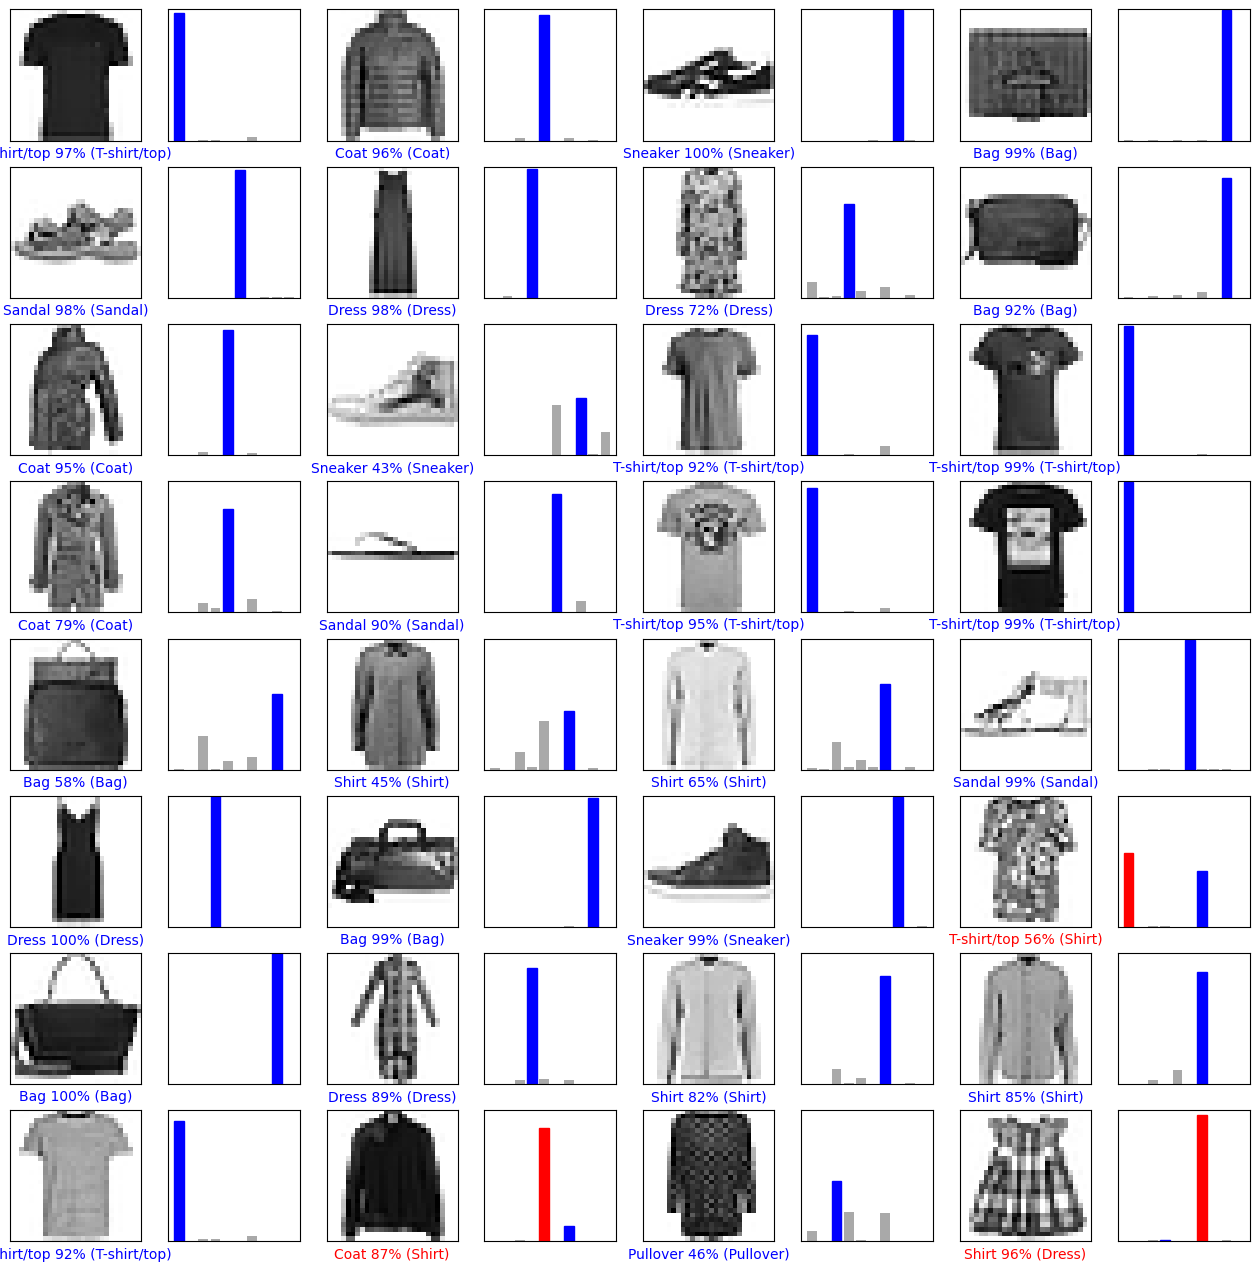

In [127]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [128]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.83      0.82      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.69      0.80      0.74      1000
       Dress       0.82      0.89      0.85      1000
        Coat       0.74      0.75      0.75      1000
      Sandal       0.94      0.93      0.93      1000
       Shirt       0.70      0.51      0.59      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.94      0.95      0.94      1000
  Ankle boot       0.95      0.93      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



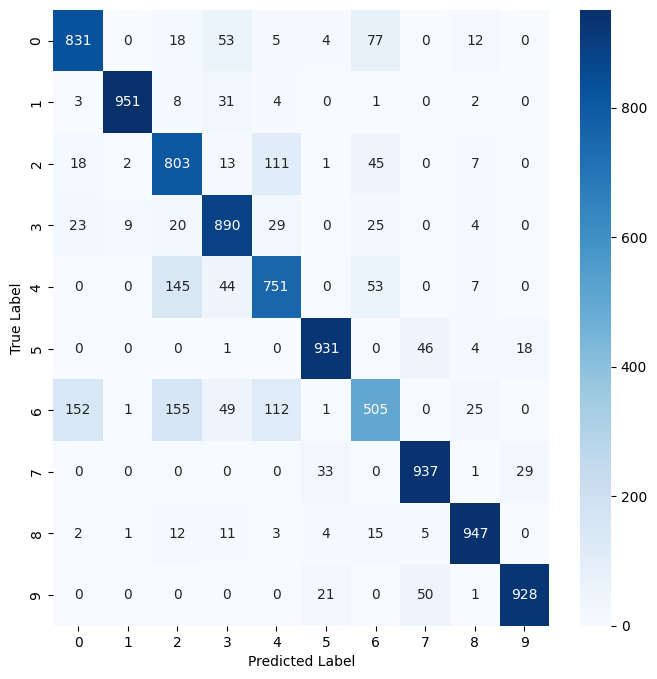

In [129]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [130]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60, # model.fit() 함수에서 batch_size의 기본값은 32
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3765 - accuracy: 0.8657 - val_loss: 0.4069 - val_accuracy: 0.8598
Epoch 2/60
1313/1313 [==============================] - 10s 7ms/step - loss: 0.3755 - accuracy: 0.8662 - val_loss: 0.4091 - val_accuracy: 0.8595
Epoch 3/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3747 - accuracy: 0.8675 - val_loss: 0.4097 - val_accuracy: 0.8587
Epoch 4/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3731 - accuracy: 0.8666 - val_loss: 0.4054 - val_accuracy: 0.8606
Epoch 5/60
1313/1313 [==============================] - 10s 7ms/step - loss: 0.3723 - accuracy: 0.8676 - val_loss: 0.4054 - val_accuracy: 0.8593
Epoch 6/60
1313/1313 [==============================] - 10s 7ms/step - loss: 0.3714 - accuracy: 0.8681 - val_loss: 0.4213 - val_accuracy: 0.8534
Epoch 7/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3705 - accuracy: 0.8678 - val_loss: 0.4064 - val_accur

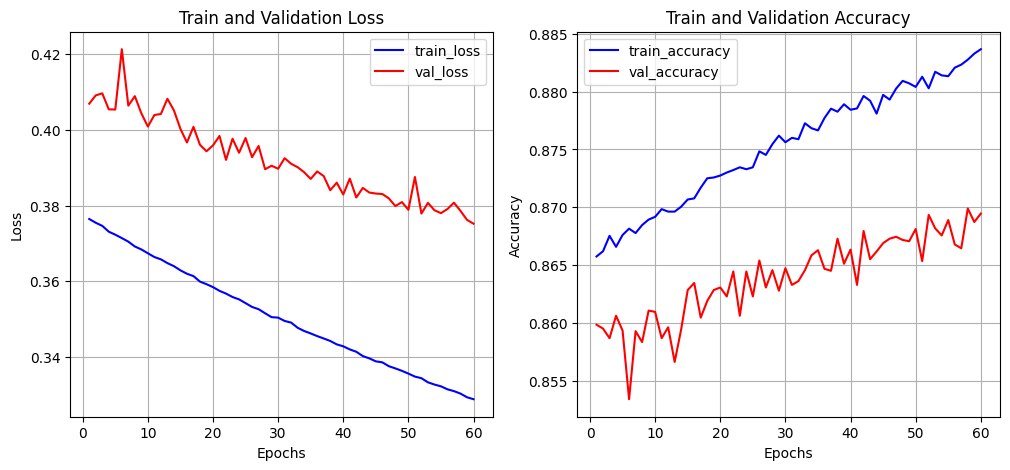

In [131]:
show_history(history)

In [132]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8592


[0.39587754011154175, 0.8592000007629395]

In [133]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu')) # 활성화 함수 sigmoid -> ReLU로 변경
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 512)               401920    
                                                                 
 dense_35 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [134]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.7618 - accuracy: 0.7621 - val_loss: 0.5831 - val_accuracy: 0.8041
Epoch 2/60
1313/1313 [==============================] - 11s 8ms/step - loss: 0.5278 - accuracy: 0.8239 - val_loss: 0.5054 - val_accuracy: 0.8308
Epoch 3/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4791 - accuracy: 0.8351 - val_loss: 0.4751 - val_accuracy: 0.8406
Epoch 4/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4520 - accuracy: 0.8442 - val_loss: 0.4846 - val_accuracy: 0.8306
Epoch 5/60
1313/1313 [==============================] - 10s 7ms/step - loss: 0.4327 - accuracy: 0.8504 - val_loss: 0.4391 - val_accuracy: 0.8527
Epoch 6/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4177 - accuracy: 0.8554 - val_loss: 0.4493 - val_accuracy: 0.8437
Epoch 7/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4054 - accuracy: 0.8591 - val_loss: 0.4210 - val_accura

In [135]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

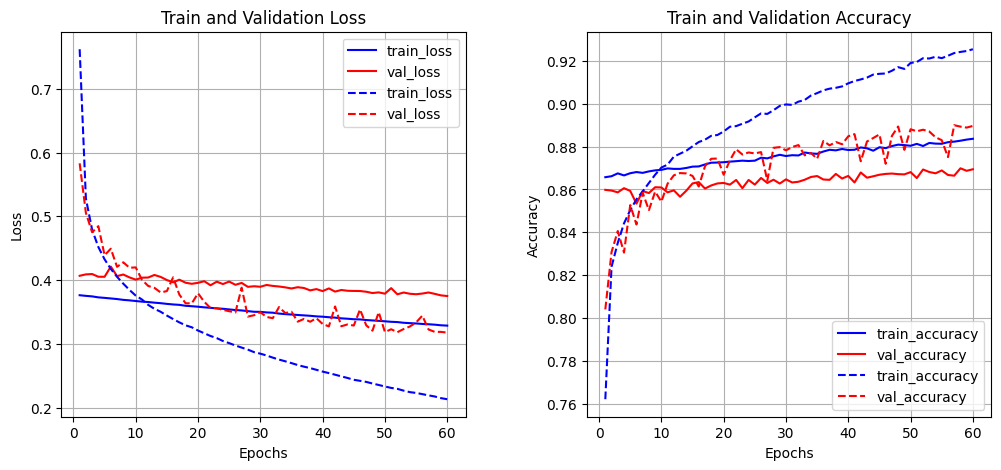

In [136]:
diff_history(history, history2)

In [137]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3418 - accuracy: 0.8799


[0.341766893863678, 0.8798999786376953]

In [138]:
# 직접 코드를 입력해보세요
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD', # 옵티마이저 변경 SGD -> adam
              metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 512)               401920    
                                                                 
 dense_37 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [139]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 11s 8ms/step - loss: 0.7764 - accuracy: 0.7542 - val_loss: 0.5855 - val_accuracy: 0.8053
Epoch 2/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.5307 - accuracy: 0.8217 - val_loss: 0.5075 - val_accuracy: 0.8276
Epoch 3/60
1313/1313 [==============================] - 7s 6ms/step - loss: 0.4801 - accuracy: 0.8349 - val_loss: 0.4979 - val_accuracy: 0.8282
Epoch 4/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4528 - accuracy: 0.8431 - val_loss: 0.4554 - val_accuracy: 0.8451
Epoch 5/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4347 - accuracy: 0.8489 - val_loss: 0.4542 - val_accuracy: 0.8401
Epoch 6/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4192 - accuracy: 0.8556 - val_loss: 0.4385 - val_accuracy: 0.8522
Epoch 7/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4073 - accuracy: 0.8582 - val_loss: 0.4351 - val_accuracy

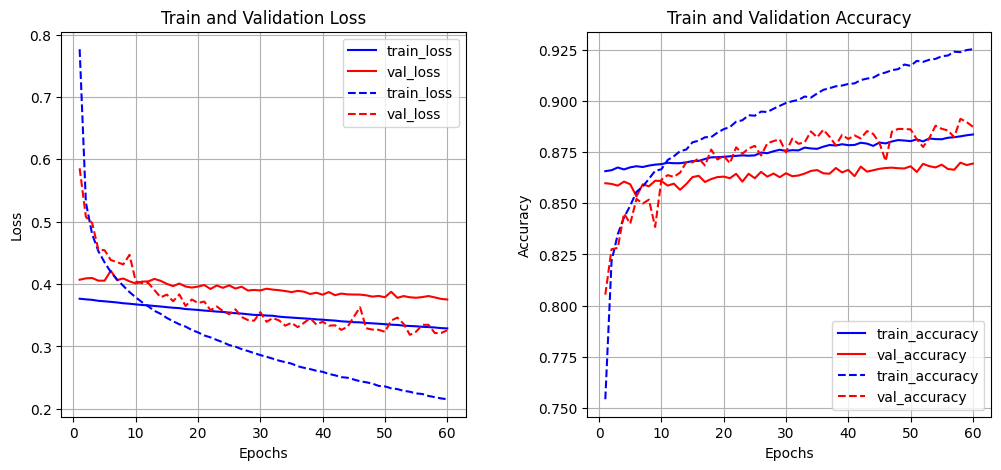

In [140]:
diff_history(history, history3)

In [141]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3477 - accuracy: 0.8748


[0.34774866700172424, 0.8748000264167786]

In [142]:
from tensorflow.keras import models, layers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2())) # L2 규제 적용
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 512)               401920    
                                                                 
 dense_39 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [143]:
history4 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 9s 7ms/step - loss: 5.6453 - accuracy: 0.7548 - val_loss: 4.3326 - val_accuracy: 0.8061
Epoch 2/60
1313/1313 [==============================] - 10s 8ms/step - loss: 3.4789 - accuracy: 0.8184 - val_loss: 2.7905 - val_accuracy: 0.8187
Epoch 3/60
1313/1313 [==============================] - 10s 8ms/step - loss: 2.2795 - accuracy: 0.8305 - val_loss: 1.8696 - val_accuracy: 0.8366
Epoch 4/60
1313/1313 [==============================] - 10s 7ms/step - loss: 1.5734 - accuracy: 0.8350 - val_loss: 1.3461 - val_accuracy: 0.8311
Epoch 5/60
1313/1313 [==============================] - 9s 7ms/step - loss: 1.1521 - accuracy: 0.8387 - val_loss: 1.0311 - val_accuracy: 0.8315
Epoch 6/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.9008 - accuracy: 0.8419 - val_loss: 0.8364 - val_accuracy: 0.8333
Epoch 7/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.7514 - accuracy: 0.8443 - val_loss: 0.7193 - val_accur

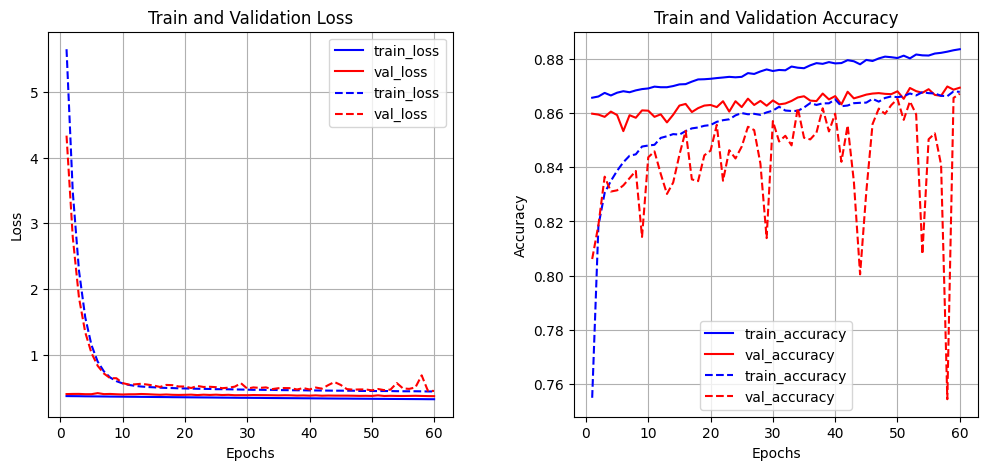

In [144]:
diff_history(history, history4)

In [145]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4739 - accuracy: 0.8555


[0.4738513231277466, 0.8554999828338623]

In [146]:
from tensorflow.keras import models, layers, optimizers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
#model.add(layers.Dropout(0.5)) # 드롭아웃 추가
#model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2()))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [147]:
history5 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 10s 7ms/step - loss: 0.8664 - accuracy: 0.7116 - val_loss: 0.5968 - val_accuracy: 0.8093
Epoch 2/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.5947 - accuracy: 0.8004 - val_loss: 0.5183 - val_accuracy: 0.8278
Epoch 3/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.5327 - accuracy: 0.8173 - val_loss: 0.4828 - val_accuracy: 0.8358
Epoch 4/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4968 - accuracy: 0.8290 - val_loss: 0.4584 - val_accuracy: 0.8444
Epoch 5/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4736 - accuracy: 0.8350 - val_loss: 0.4400 - val_accuracy: 0.8491
Epoch 6/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4537 - accuracy: 0.8411 - val_loss: 0.4324 - val_accuracy: 0.8525
Epoch 7/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4394 - accuracy: 0.8449 - val_loss: 0.4187 - val_accuracy

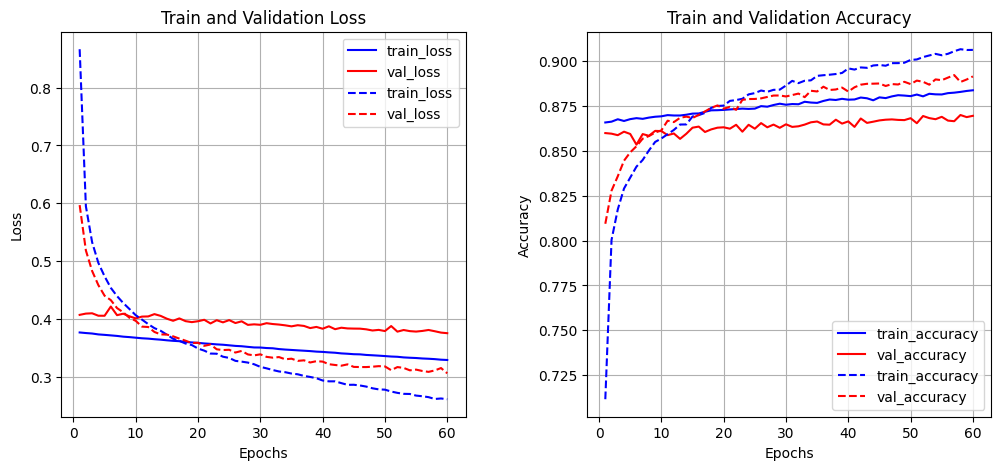

In [148]:
diff_history(history, history5)

In [149]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.8835


[0.3294745683670044, 0.8834999799728394]

In [150]:
from tensorflow.keras import models, layers, optimizers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_8 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_42 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_9 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_43 (Dense)            (None, 10)                5130      
                                                                 
Total params: 412,234
Trainable params: 409,642
Non-trainable params: 2,592
_________________________________________________________________


In [151]:
history6 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 14s 10ms/step - loss: 0.5250 - accuracy: 0.8182 - val_loss: 0.4215 - val_accuracy: 0.8522
Epoch 2/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3905 - accuracy: 0.8591 - val_loss: 0.3795 - val_accuracy: 0.8692
Epoch 3/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3519 - accuracy: 0.8726 - val_loss: 0.3619 - val_accuracy: 0.8761
Epoch 4/60
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3266 - accuracy: 0.8834 - val_loss: 0.3545 - val_accuracy: 0.8781
Epoch 5/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3053 - accuracy: 0.8894 - val_loss: 0.3514 - val_accuracy: 0.8786
Epoch 6/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.2894 - accuracy: 0.8955 - val_loss: 0.3390 - val_accuracy: 0.8819
Epoch 7/60
1313/1313 [==============================] - 14s 10ms/step - loss: 0.2768 - accuracy: 0.8992 - val_loss: 0.3404 -

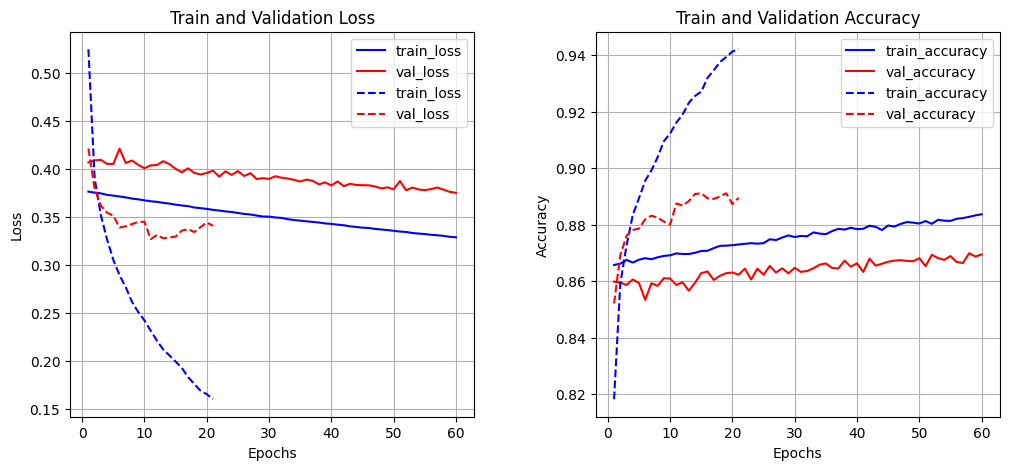

In [152]:
diff_history(history, history6)

In [153]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3607 - accuracy: 0.8754


[0.36070480942726135, 0.8754000067710876]

In [154]:
from tensorflow.keras import models, layers, optimizers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_10 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_11 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_45 (Dense)            (None, 10)                5130      
                                                                 
Total params: 412,234
Trainable params: 409,642
Non-t

In [155]:
history7 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 17s 12ms/step - loss: 0.6966 - accuracy: 0.7567 - val_loss: 0.4451 - val_accuracy: 0.8417
Epoch 2/60
1313/1313 [==============================] - 15s 11ms/step - loss: 0.5060 - accuracy: 0.8199 - val_loss: 0.4049 - val_accuracy: 0.8582
Epoch 3/60
1313/1313 [==============================] - 15s 11ms/step - loss: 0.4703 - accuracy: 0.8307 - val_loss: 0.3917 - val_accuracy: 0.8636
Epoch 4/60
1313/1313 [==============================] - 15s 11ms/step - loss: 0.4430 - accuracy: 0.8416 - val_loss: 0.3781 - val_accuracy: 0.8658
Epoch 5/60
1313/1313 [==============================] - 14s 11ms/step - loss: 0.4255 - accuracy: 0.8473 - val_loss: 0.3658 - val_accuracy: 0.8722
Epoch 6/60
1313/1313 [==============================] - 15s 11ms/step - loss: 0.4109 - accuracy: 0.8527 - val_loss: 0.3607 - val_accuracy: 0.8714
Epoch 7/60
1313/1313 [==============================] - 15s 11ms/step - loss: 0.3965 - accuracy: 0.8557 - val_loss: 0.3555 -

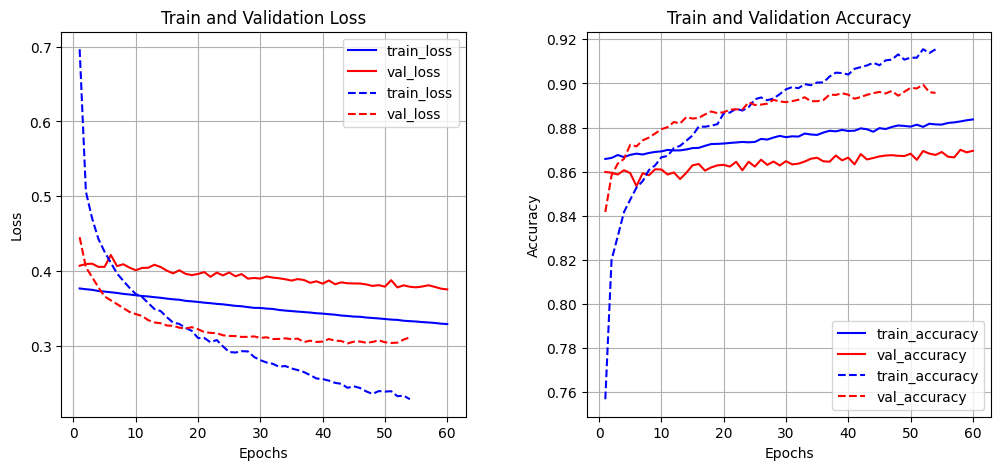

In [156]:
diff_history(history, history7)

In [ ]:
model.evaluate(x_test, y_test)

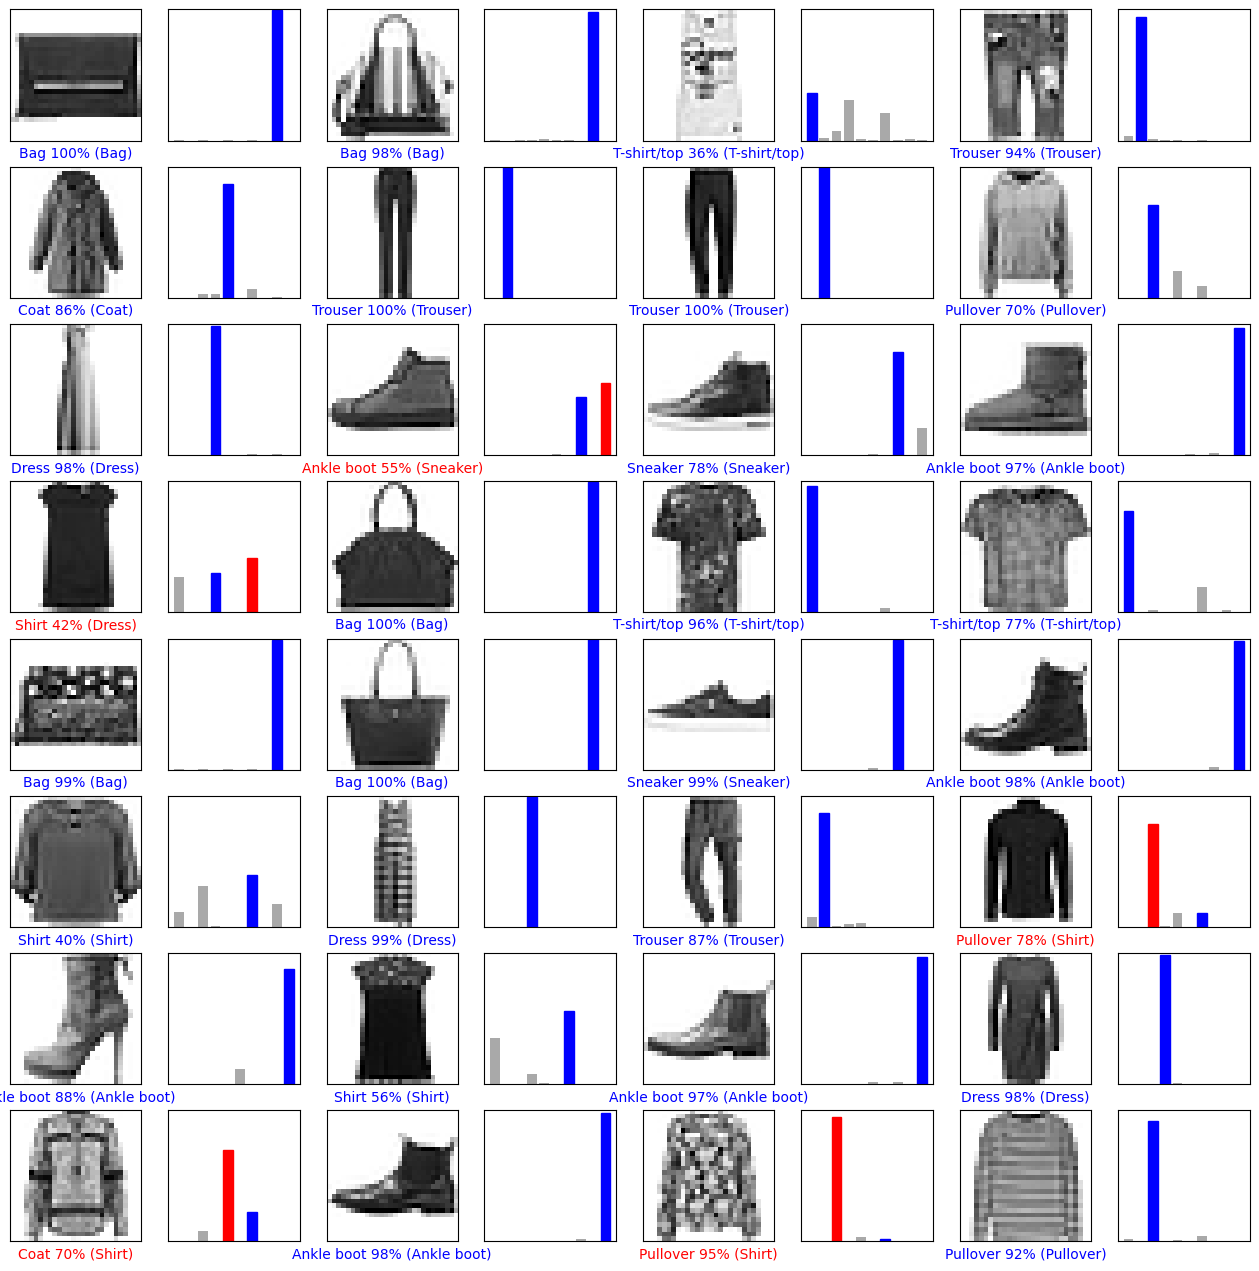

In [157]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [158]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.83      0.82      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.69      0.80      0.74      1000
       Dress       0.82      0.89      0.85      1000
        Coat       0.74      0.75      0.75      1000
      Sandal       0.94      0.93      0.93      1000
       Shirt       0.70      0.51      0.59      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.94      0.95      0.94      1000
  Ankle boot       0.95      0.93      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



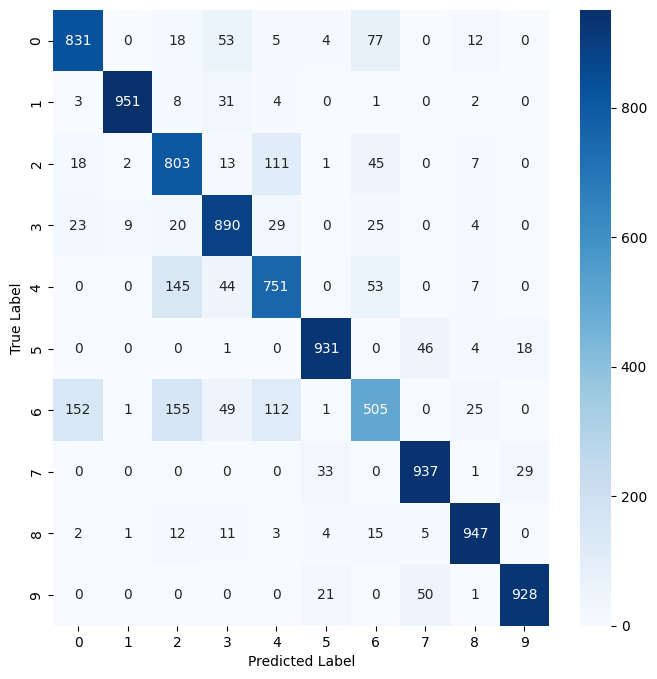

In [159]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()